In [1]:
import nbformat
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import spearmanr

In [2]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_SimpleStew/'

In [3]:
final_df=pd.read_csv('SimpleStew_MS_PerStep.csv')

In [4]:
filtered_carrot = final_df[final_df['Step'].str.strip() == 'Add Carrot']
filtered_carrot = filtered_carrot[filtered_carrot['Participant'] != 'C029']
filtered_carrot
#C029 is not included

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
1,C001,36,Add Carrot,288.999699,379.583666,865.589347,584.494307,1058.248780,1419.609542,0.000000,0.000000
11,C003,58,Add Carrot,342.419485,393.899984,1100.342364,516.583023,994.127968,1303.629360,870.251108,627.740690
21,C006,42,Add Carrot,242.227829,497.650444,357.158209,437.660008,1105.580046,2196.767365,1636.134402,1063.917884
31,C008,34,Add Carrot,818.867019,990.337315,1028.366151,950.469346,1062.438061,3460.554270,2789.408117,1910.393651
41,C009,24,Add Carrot,649.742863,966.420435,841.597911,738.418392,783.598291,3130.228025,2427.025741,1648.663520
50,C012,54,Add Carrot,154.774876,228.369369,357.055523,251.000307,533.429921,1497.255158,901.943739,545.204334
60,C013,48,Add Carrot,1109.909673,1233.385764,1987.304044,1717.143781,2655.640645,2106.048150,1773.162285,1461.976485
68,C016,39,Add Carrot,190.101702,260.823421,730.316233,547.717473,882.843151,1197.011647,939.562708,690.801469
78,C017,36,Add Carrot,331.277532,490.245922,811.733563,510.211697,1143.469149,1371.036530,1075.218827,721.418378
88,C020,30,Add Carrot,334.760673,451.081132,783.782422,568.637991,982.269754,1316.764144,918.493993,677.122371


In [5]:
from sklearn.impute import KNNImputer
import numpy as np

filtered_carrot = filtered_carrot.copy()
imputer = KNNImputer(n_neighbors=1)

numerical_cols = filtered_carrot.select_dtypes(include=['float64', 'int64']).columns
filtered_carrot[numerical_cols] = filtered_carrot[numerical_cols].replace(0, np.nan)

filtered_carrot[numerical_cols] = imputer.fit_transform(filtered_carrot[numerical_cols])
filtered_carrot

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
1,C001,36.0,Add Carrot,288.999699,379.583666,865.589347,584.494307,1058.248780,1419.609542,918.493993,677.122371
11,C003,58.0,Add Carrot,342.419485,393.899984,1100.342364,516.583023,994.127968,1303.629360,870.251108,627.740690
21,C006,42.0,Add Carrot,242.227829,497.650444,357.158209,437.660008,1105.580046,2196.767365,1636.134402,1063.917884
31,C008,34.0,Add Carrot,818.867019,990.337315,1028.366151,950.469346,1062.438061,3460.554270,2789.408117,1910.393651
41,C009,24.0,Add Carrot,649.742863,966.420435,841.597911,738.418392,783.598291,3130.228025,2427.025741,1648.663520
50,C012,54.0,Add Carrot,154.774876,228.369369,357.055523,251.000307,533.429921,1497.255158,901.943739,545.204334
60,C013,48.0,Add Carrot,1109.909673,1233.385764,1987.304044,1717.143781,2655.640645,2106.048150,1773.162285,1461.976485
68,C016,39.0,Add Carrot,190.101702,260.823421,730.316233,547.717473,882.843151,1197.011647,939.562708,690.801469
78,C017,36.0,Add Carrot,331.277532,490.245922,811.733563,510.211697,1143.469149,1371.036530,1075.218827,721.418378
88,C020,30.0,Add Carrot,334.760673,451.081132,783.782422,568.637991,982.269754,1316.764144,918.493993,677.122371


In [6]:
new_column_names = {
    'Chest Distance': 'Chest Distance - Add Carrot',
    'HeadCamera Distance': 'HeadCamera Distance - Add Carrot',
    'LeftElbow Distance': 'LeftElbow Distance - Add Carrot',
    'LeftShoulder Distance': 'LeftShoulder Distance - Add Carrot',
    'MotionControllerLeft Distance': 'MotionControllerLeft Distance - Add Carrot',
    'MotionControllerRight Distance': 'MotionControllerRight Distance - Add Carrot',
    'RightElbow Distance': 'RightElbow Distance - Add Carrot',
    'RightShoulder Distance': 'RightShoulder Distance - Add Carrot'
}

# Rename columns
filtered_carrot = filtered_carrot.rename(columns=new_column_names)
filtered_carrot

,Participant,Block Design Raw Score,Step,Chest Distance - Add Carrot,HeadCamera Distance - Add Carrot,LeftElbow Distance - Add Carrot,LeftShoulder Distance - Add Carrot,MotionControllerLeft Distance - Add Carrot,MotionControllerRight Distance - Add Carrot,RightElbow Distance - Add Carrot,RightShoulder Distance - Add Carrot
1,C001,36.0,Add Carrot,288.999699,379.583666,865.589347,584.494307,1058.248780,1419.609542,918.493993,677.122371
11,C003,58.0,Add Carrot,342.419485,393.899984,1100.342364,516.583023,994.127968,1303.629360,870.251108,627.740690
21,C006,42.0,Add Carrot,242.227829,497.650444,357.158209,437.660008,1105.580046,2196.767365,1636.134402,1063.917884
31,C008,34.0,Add Carrot,818.867019,990.337315,1028.366151,950.469346,1062.438061,3460.554270,2789.408117,1910.393651
41,C009,24.0,Add Carrot,649.742863,966.420435,841.597911,738.418392,783.598291,3130.228025,2427.025741,1648.663520
50,C012,54.0,Add Carrot,154.774876,228.369369,357.055523,251.000307,533.429921,1497.255158,901.943739,545.204334
60,C013,48.0,Add Carrot,1109.909673,1233.385764,1987.304044,1717.143781,2655.640645,2106.048150,1773.162285,1461.976485
68,C016,39.0,Add Carrot,190.101702,260.823421,730.316233,547.717473,882.843151,1197.011647,939.562708,690.801469
78,C017,36.0,Add Carrot,331.277532,490.245922,811.733563,510.211697,1143.469149,1371.036530,1075.218827,721.418378
88,C020,30.0,Add Carrot,334.760673,451.081132,783.782422,568.637991,982.269754,1316.764144,918.493993,677.122371


In [7]:
tracker_columns = ['Chest Distance - Add Carrot', 'HeadCamera Distance - Add Carrot', 'LeftElbow Distance - Add Carrot', 'LeftShoulder Distance - Add Carrot',
                   'RightElbow Distance - Add Carrot', 'RightShoulder Distance - Add Carrot', 'MotionControllerLeft Distance - Add Carrot',
                   'MotionControllerRight Distance - Add Carrot']
block_design_col = 'Block Design Raw Score'

# Function to calculate and display correlation for each tracker
def calculate_correlations(filtered_carrot, tracker_columns, block_design_col):
    correlations = []
    for tracker_col in tracker_columns:
        # Calculate Spearman correlation and p-value without any filtering
        correlation, p_value = spearmanr(filtered_carrot[block_design_col], filtered_carrot[tracker_col])
        correlations.append({
            'Tracker': tracker_col,
            'Correlation': correlation,
            'P-value': p_value
        })
    corr_df = pd.DataFrame(correlations)
    return corr_df

# Calculate and display correlations
correlation_df = calculate_correlations(filtered_carrot, tracker_columns, block_design_col)
correlation_df

,Tracker,Correlation,P-value
0,Chest Distance - Add Carrot,-0.422044,0.117108
1,HeadCamera Distance - Add Carrot,-0.397495,0.142323
2,LeftElbow Distance - Add Carrot,-0.365265,0.180650
3,LeftShoulder Distance - Add Carrot,-0.565803,0.027916
4,RightElbow Distance - Add Carrot,-0.343191,0.210451
5,RightShoulder Distance - Add Carrot,-0.434589,0.105495
6,MotionControllerLeft Distance - Add Carrot,-0.302597,0.272974
7,MotionControllerRight Distance - Add Carrot,-0.295435,0.285049


In [8]:
#filtered_carrot.to_csv('SimpleStew_AddCarrot.csv',index=False)

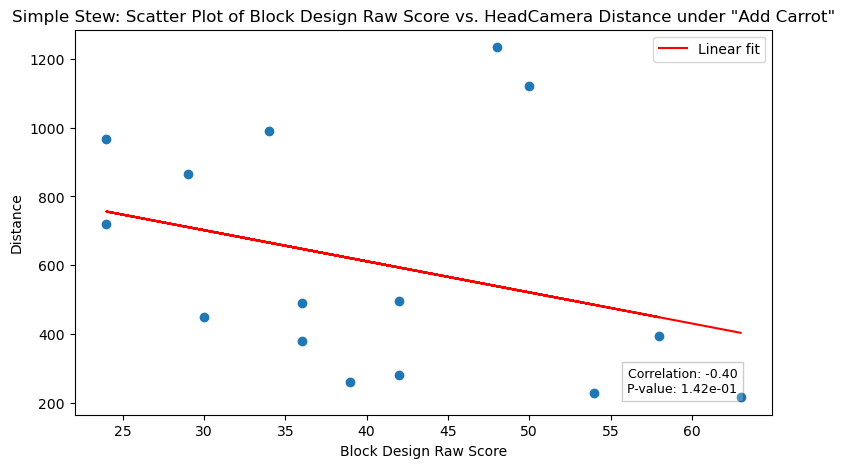

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

correlation, p_value = spearmanr(filtered_carrot['Block Design Raw Score'], filtered_carrot['HeadCamera Distance - Add Carrot'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_carrot['Block Design Raw Score'], filtered_carrot['HeadCamera Distance - Add Carrot'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_carrot['Block Design Raw Score'], filtered_carrot['HeadCamera Distance - Add Carrot'], 1)
fit_line = slope * filtered_carrot['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_carrot['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. HeadCamera Distance under "Add Carrot"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '25 SS_CarrotDistanceHeadCam.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

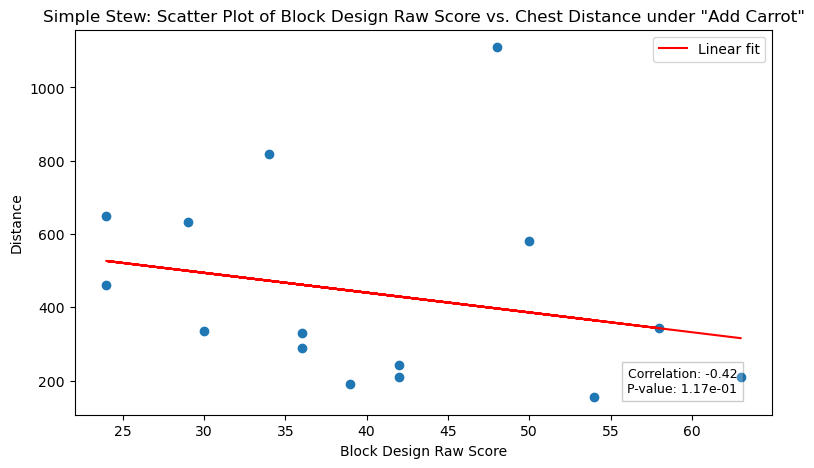

In [10]:
correlation, p_value = spearmanr(filtered_carrot['Block Design Raw Score'], filtered_carrot['Chest Distance - Add Carrot'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_carrot['Block Design Raw Score'], filtered_carrot['Chest Distance - Add Carrot'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_carrot['Block Design Raw Score'], filtered_carrot['Chest Distance - Add Carrot'], 1)
fit_line = slope * filtered_carrot['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_carrot['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Chest Distance under "Add Carrot"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '26 SS_CarrotDistanceChest.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

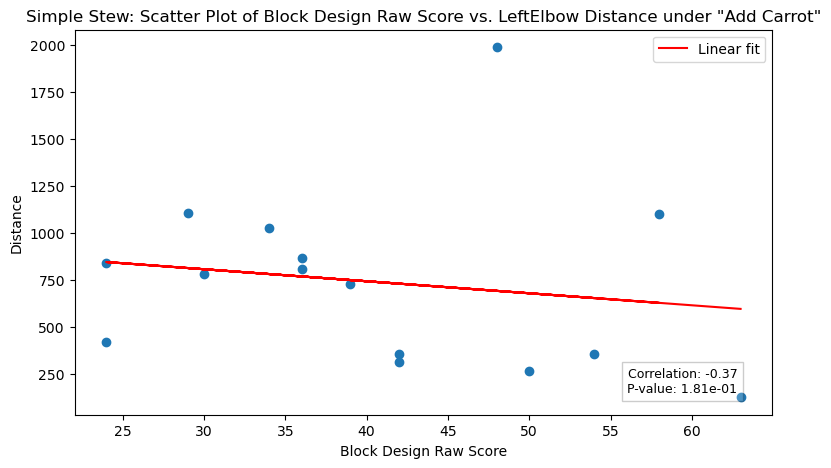

In [11]:
correlation, p_value = spearmanr(filtered_carrot['Block Design Raw Score'], filtered_carrot['LeftElbow Distance - Add Carrot'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_carrot['Block Design Raw Score'], filtered_carrot['LeftElbow Distance - Add Carrot'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_carrot['Block Design Raw Score'], filtered_carrot['LeftElbow Distance - Add Carrot'], 1)
fit_line = slope * filtered_carrot['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_carrot['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. LeftElbow Distance under "Add Carrot"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '27 SS_CarrotDistanceLeftElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

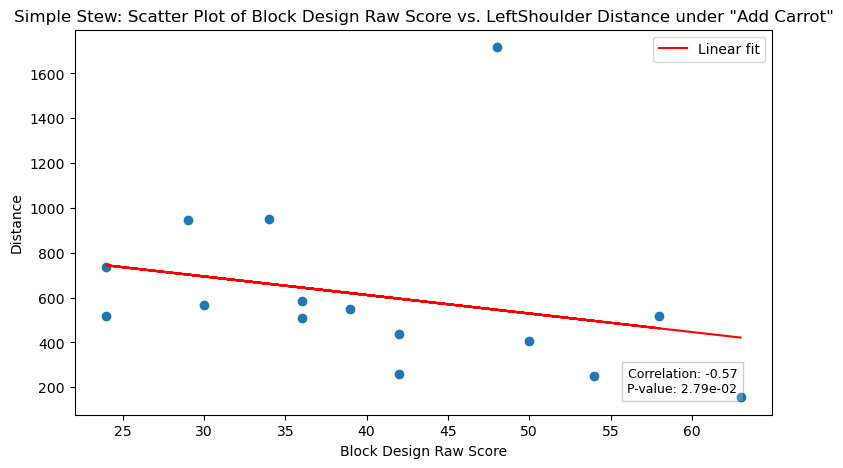

In [12]:
correlation, p_value = spearmanr(filtered_carrot['Block Design Raw Score'], filtered_carrot['LeftShoulder Distance - Add Carrot'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_carrot['Block Design Raw Score'], filtered_carrot['LeftShoulder Distance - Add Carrot'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_carrot['Block Design Raw Score'], filtered_carrot['LeftShoulder Distance - Add Carrot'], 1)
fit_line = slope * filtered_carrot['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_carrot['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. LeftShoulder Distance under "Add Carrot"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '28 SS_CarrotDistanceLeftShoulder.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

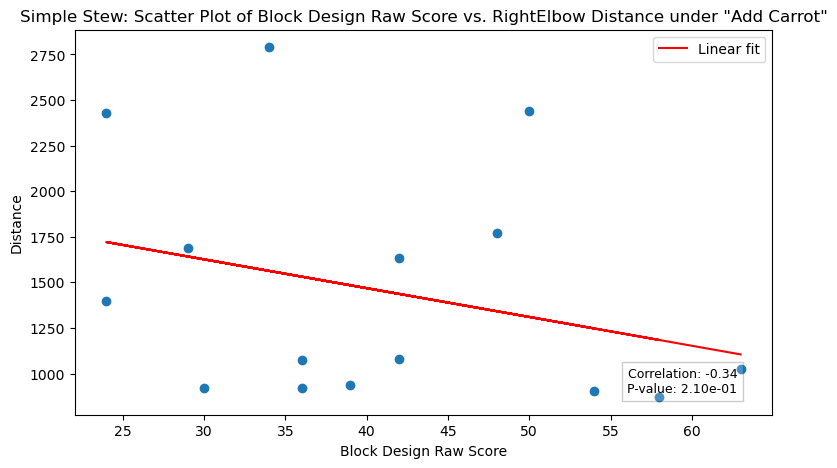

In [13]:
correlation, p_value = spearmanr(filtered_carrot['Block Design Raw Score'], filtered_carrot['RightElbow Distance - Add Carrot'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_carrot['Block Design Raw Score'], filtered_carrot['RightElbow Distance - Add Carrot'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_carrot['Block Design Raw Score'], filtered_carrot['RightElbow Distance - Add Carrot'], 1)
fit_line = slope * filtered_carrot['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_carrot['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. RightElbow Distance under "Add Carrot"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '29 SS_CarrotDistanceRightElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

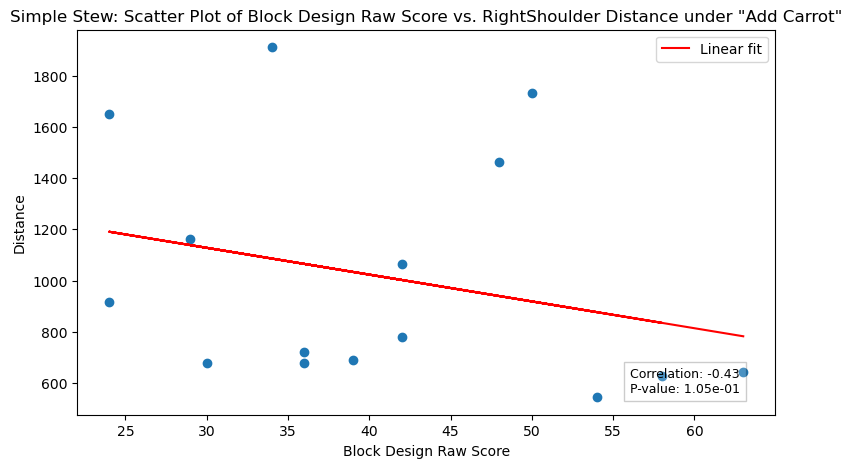

In [14]:
correlation, p_value = spearmanr(filtered_carrot['Block Design Raw Score'], filtered_carrot['RightShoulder Distance - Add Carrot'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_carrot['Block Design Raw Score'], filtered_carrot['RightShoulder Distance - Add Carrot'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_carrot['Block Design Raw Score'], filtered_carrot['RightShoulder Distance - Add Carrot'], 1)
fit_line = slope * filtered_carrot['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_carrot['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. RightShoulder Distance under "Add Carrot"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '30 SS_CarrotDistanceRightShoulder.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

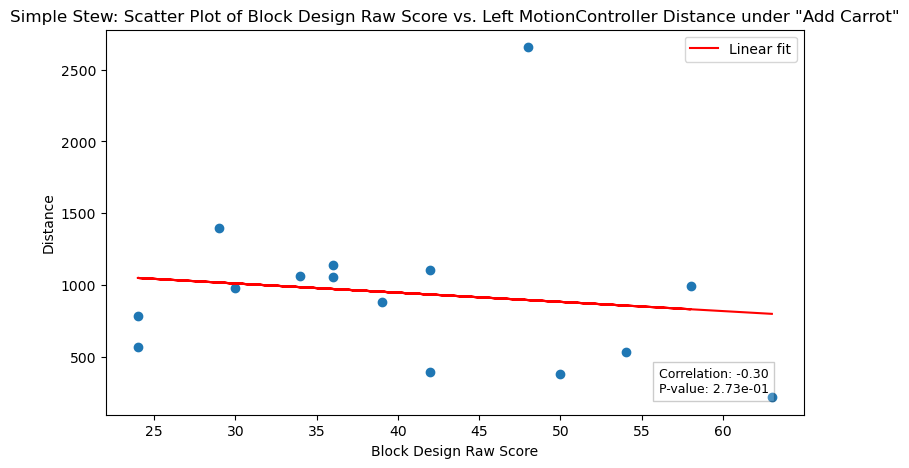

In [15]:
correlation, p_value = spearmanr(filtered_carrot['Block Design Raw Score'], filtered_carrot['MotionControllerLeft Distance - Add Carrot'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_carrot['Block Design Raw Score'], filtered_carrot['MotionControllerLeft Distance - Add Carrot'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_carrot['Block Design Raw Score'], filtered_carrot['MotionControllerLeft Distance - Add Carrot'], 1)
fit_line = slope * filtered_carrot['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_carrot['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Left MotionController Distance under "Add Carrot"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '31 SS_CarrotDistanceLeftContrl.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

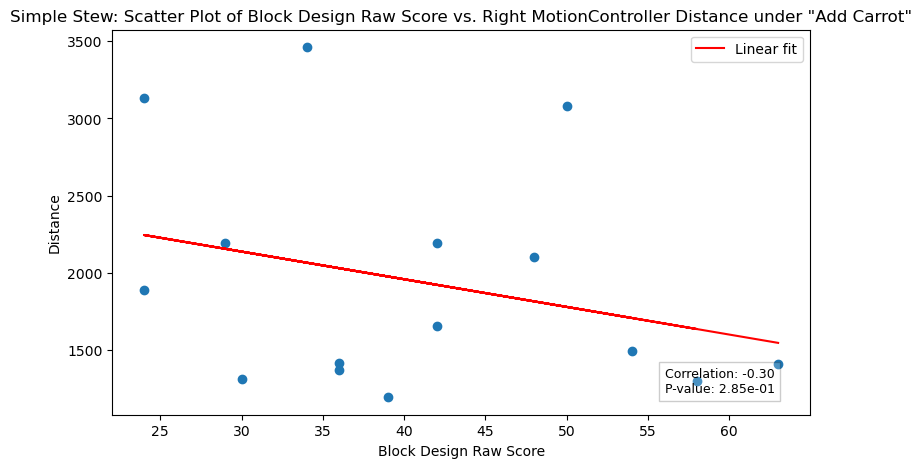

In [16]:
correlation, p_value = spearmanr(filtered_carrot['Block Design Raw Score'], filtered_carrot['MotionControllerRight Distance - Add Carrot'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_carrot['Block Design Raw Score'], filtered_carrot['MotionControllerRight Distance - Add Carrot'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_carrot['Block Design Raw Score'], filtered_carrot['MotionControllerRight Distance - Add Carrot'], 1)
fit_line = slope * filtered_carrot['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_carrot['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Right MotionController Distance under "Add Carrot"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '32 SS_CarrotDistanceRightContrl.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()